In [123]:
#라이브러리 로드
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
matplotlib.font_manager._rebuild()
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.decomposition import PCA, LatentDirichletAllocation

sns.set(style='whitegrid')
pd.set_option('display.max_rows',500)
font_path = r'F:\download\NanumFontSetup_TTF_GOTHIC.NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [159]:
#코로나 일별 확진자수 데이터로드 및 전처리
df = pd.read_csv('F:\\drive\\WebWorkPlace2021\\jupyter\\code\\kopis_data\\kopis_preprocessed_data.csv'
                             )

In [160]:
#Month 제거버전
df_no_month = df.drop('reservation_month',axis=1 ,inplace=False)

In [161]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [173]:
df_no_month.drop(['Unnamed: 0'],axis=1, inplace=True)

In [162]:
df.describe()

,reservation_month,reservation_day,count,temp_avg,temp_low,temp_high,humidity_avg,rain,KOSPI,KOSDAQ,count_KOSPI,count_KOSDAQ,count_subway,count_covid
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,6.513661,15.756831,32896.896175,13.269399,8.696721,18.541530,69.379781,4.337432,2220.611257,752.946776,59679.478142,110560.112022,5.369293e+06,165.975410
std,3.455958,8.823592,18045.373583,8.793587,9.399096,8.537407,13.475723,10.849945,274.779298,114.220353,46183.751827,83670.715351,1.570940e+06,263.249924
min,1.000000,1.000000,6248.000000,-6.500000,-11.500000,-1.200000,41.000000,0.000000,1457.640000,428.350000,0.000000,0.000000,1.779986e+06,-531.000000
25%,4.000000,8.000000,18503.250000,5.700000,0.700000,10.800000,58.000000,0.000000,2040.220000,669.992500,0.000000,0.000000,4.189510e+06,26.000000
50%,7.000000,16.000000,30561.500000,12.750000,7.250000,19.600000,71.000000,0.100000,2217.025000,753.525000,69604.500000,136104.500000,5.681751e+06,61.500000
75%,9.750000,23.000000,42634.250000,21.100000,17.800000,25.475000,80.000000,1.875000,2368.250000,846.860000,91394.250000,172329.000000,6.586319e+06,154.500000
max,12.000000,31.000000,95090.000000,28.400000,25.400000,33.500000,95.000000,83.200000,2873.470000,968.420000,196812.000000,318511.000000,8.478415e+06,1257.000000


In [163]:
df.head(3)

,reservation_month,reservation_day,count,date,temp_avg,temp_low,temp_high,humidity_avg,rain,KOSPI,KOSDAQ,count_KOSPI,count_KOSDAQ,count_subway,count_covid
0,1,1,51947,2020/01/01,-0.9,-6.5,4.1,63,0.0,2175.17,674.02,0,0,3466694.5,0
1,1,2,76858,2020/01/02,1.6,-2.6,6.4,69,0.0,2175.17,674.02,48861,78373,7679034.0,0
2,1,3,80551,2020/01/03,2.1,-2.0,7.7,65,0.0,2176.46,669.93,62253,90386,8211982.0,0


In [129]:
#추후 계획
#건수를 target
#나머지를 feature
#날짜에서 요일 추출해서 feature 추가 혹은 주말여부 추가(요일로 할지, 주말로 할지)
#예매일시_month, 요일은 OnehotEncoding
#타겟, 피처에 성능 개선을 위해 로그변환, 스탠다드스케일링 적용

#----------------------------------------------
#PCA 혹은 LDA
#Lasso, Ridge, ElasticNet, LightGBM 다 시도
#예측성능 좋은 모델 채택


# 전처리에서 예매취소인것과 아닌것 구분해서 재시도
# 해당 분기에 상영작 대비 예매건수로 다시 집계하여 시도
# 피처에 비트코인 관련 데이터도 추가
# 피처에 각각 분리해서 다시 시도
# 매체 관련 데이터 구할 수 있으면 추가
# 공공자전거 데이터, 지자체별 배출내역목록데이터, 일별식사데이터 추가

In [164]:
# X.info()
df['date'] = df['date'].apply(pd.to_datetime)
df['weekday'] = df['date'].dt.weekday

In [170]:
#month 없는 버전
df_no_month['date'] = df_no_month['date'].apply(pd.to_datetime)
df_no_month['weekday'] = df_no_month['date'].dt.weekday

In [165]:
df.drop(['reservation_day','date'],axis=1, inplace=True)

In [171]:
df_no_month.drop(['reservation_day','date'],axis=1, inplace=True)

In [166]:
df.columns

Index(['reservation_month', 'count', 'temp_avg', 'temp_low', 'temp_high',
       'humidity_avg', 'rain', 'KOSPI', 'KOSDAQ', 'count_KOSPI',
       'count_KOSDAQ', 'count_subway', 'count_covid', 'weekday'],
      dtype='object')

In [174]:
df_no_month.columns

Index(['count', 'temp_avg', 'temp_low', 'temp_high', 'humidity_avg', 'rain',
       'KOSPI', 'KOSDAQ', 'count_KOSPI', 'count_KOSDAQ', 'count_subway',
       'count_covid', 'weekday'],
      dtype='object')

In [167]:
df[['reservation_month','weekday']] = df[['reservation_month','weekday']].astype(str)

In [175]:
df_no_month[['weekday']] = df_no_month[['weekday']].astype(str)

In [168]:
df=pd.get_dummies(df)

In [176]:
df_no_month=pd.get_dummies(df_no_month) 

In [169]:
#전처리된 데이터
df

,count,temp_avg,temp_low,temp_high,humidity_avg,rain,KOSPI,KOSDAQ,count_KOSPI,count_KOSDAQ,...,reservation_month_7,reservation_month_8,reservation_month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,51947,-0.9,-6.5,4.1,63,0.0,2175.17,674.02,0,0,...,0,0,0,0,0,1,0,0,0,0
1,76858,1.6,-2.6,6.4,69,0.0,2175.17,674.02,48861,78373,...,0,0,0,0,0,0,1,0,0,0
2,80551,2.1,-2.0,7.7,65,0.0,2176.46,669.93,62253,90386,...,0,0,0,0,0,0,0,1,0,0
3,64127,1.6,-3.4,8.0,65,0.0,2176.46,669.93,0,0,...,0,0,0,0,0,0,0,0,1,0
4,54152,1.5,-4.5,8.8,61,0.0,2176.46,669.93,0,0,...,0,0,0,0,0,0,0,0,0,1
5,48601,3.5,-0.4,5.8,82,10.0,2155.07,655.31,58747,88428,...,0,0,0,1,0,0,0,0,0,0
6,66986,8.8,4.9,13.5,95,41.8,2175.54,663.44,55933,97031,...,0,0,0,0,1,0,0,0,0,0
7,77827,5.4,3.2,11.5,78,4.5,2151.31,640.94,89962,137971,...,0,0,0,0,0,1,0,0,0,0
8,81881,1.9,-1.2,5.4,66,0.0,2186.45,666.09,58333,98062,...,0,0,0,0,0,0,1,0,0,0
9,72927,1.0,-3.6,7.5,68,0.0,2206.39,673.03,58415,83739,...,0,0,0,0,0,0,0,1,0,0


In [177]:
#전처리된 데이터 중 원핫인코딩된 월 컬럼 없는 버전 
df_no_month

,count,temp_avg,temp_low,temp_high,humidity_avg,rain,KOSPI,KOSDAQ,count_KOSPI,count_KOSDAQ,count_subway,count_covid,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,51947,-0.9,-6.5,4.1,63,0.0,2175.17,674.02,0,0,3466694.5,0,0,0,1,0,0,0,0
1,76858,1.6,-2.6,6.4,69,0.0,2175.17,674.02,48861,78373,7679034.0,0,0,0,0,1,0,0,0
2,80551,2.1,-2.0,7.7,65,0.0,2176.46,669.93,62253,90386,8211982.0,0,0,0,0,0,1,0,0
3,64127,1.6,-3.4,8.0,65,0.0,2176.46,669.93,0,0,6027700.5,0,0,0,0,0,0,1,0
4,54152,1.5,-4.5,8.8,61,0.0,2176.46,669.93,0,0,4412501.0,0,0,0,0,0,0,0,1
5,48601,3.5,-0.4,5.8,82,10.0,2155.07,655.31,58747,88428,7806476.0,0,1,0,0,0,0,0,0
6,66986,8.8,4.9,13.5,95,41.8,2175.54,663.44,55933,97031,7611871.0,0,0,1,0,0,0,0,0
7,77827,5.4,3.2,11.5,78,4.5,2151.31,640.94,89962,137971,7982411.0,0,0,0,1,0,0,0,0
8,81881,1.9,-1.2,5.4,66,0.0,2186.45,666.09,58333,98062,8107989.0,0,0,0,0,1,0,0,0
9,72927,1.0,-3.6,7.5,68,0.0,2206.39,673.03,58415,83739,8450690.0,0,0,0,0,0,1,0,0


In [223]:
#월 컬럼 있는 버전의 데이터프레임
#타겟(y)이 예매 건수
#피처(X)가 나머지 컬럼
y = df['count']
df_ = df.drop('count', axis=1, inplace=False)
X = df_

In [208]:
#월 컬럼 없는 버전의 데이터프레임
#타겟(y)이 예매 건수
#피처(X)가 나머지 컬럼
y = df_no_month['count']
df_no_month_ = df_no_month.drop('count', axis=1, inplace=False)
X = df_no_month_

In [224]:
y, X

(0      51947
 1      76858
 2      80551
 3      64127
 4      54152
 5      48601
 6      66986
 7      77827
 8      81881
 9      72927
 10     77335
 11     51636
 12     48725
 13     76959
 14     72297
 15     87843
 16     76573
 17     72985
 18     50166
 19     43058
 20     68143
 21     72452
 22     64698
 23     40134
 24     36072
 25     54095
 26     47354
 27     47020
 28     60936
 29     59660
 30     56453
 31     49206
 32     33159
 33     33470
 34     41531
 35     45234
 36     42531
 37     42636
 38     32639
 39     23930
 40     25926
 41     34213
 42     34750
 43     43734
 44     36427
 45     29541
 46     22271
 47     23818
 48     39572
 49     31893
 50     30866
 51     38908
 52     25357
 53     23879
 54     24313
 55     27685
 56     19683
 57     18299
 58     22649
 59     11406
 60      9621
 61     10140
 62     17065
 63     15336
 64     11604
 65     12122
 66      9336
 67      8436
 68     12096
 69     14891
 70     18701
 71   

In [225]:
#스케일링
#StandardScaler 객체 생성
scaler = StandardScaler()

#StandardScaler로 데이터 셋 변환, fit()과 transform()호출
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled

,temp_avg,temp_low,temp_high,humidity_avg,rain,KOSPI,KOSDAQ,count_KOSPI,count_KOSDAQ,count_subway,...,reservation_month_7,reservation_month_8,reservation_month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,-1.613539,-1.619041,-1.693875,-0.474076,-0.400313,-0.165600,-0.691950,-1.293987,-1.323181,-1.212779,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,2.430156,-0.411496,-0.406946,-0.406946,-0.406946
1,-1.328852,-1.203540,-1.424104,-0.028221,-0.400313,-0.165600,-0.691950,-0.234569,-0.385215,1.472306,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,2.430156,-0.406946,-0.406946,-0.406946
2,-1.271914,-1.139616,-1.271624,-0.325458,-0.400313,-0.160899,-0.727807,0.055800,-0.241443,1.812024,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,-0.411496,2.457328,-0.406946,-0.406946
3,-1.328852,-1.288771,-1.236436,-0.325458,-0.400313,-0.160899,-0.727807,-1.293987,-1.323181,0.419691,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,-0.411496,-0.406946,2.457328,-0.406946
4,-1.340239,-1.405964,-1.142603,-0.622694,-0.400313,-0.160899,-0.727807,-1.293987,-1.323181,-0.609891,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,-0.411496,-0.406946,-0.406946,2.457328
5,-1.112489,-0.969154,-1.494479,0.937797,0.522613,-0.238850,-0.855981,-0.020218,-0.264877,1.553542,...,-0.304199,-0.304199,-0.298807,2.457328,-0.406946,-0.411496,-0.411496,-0.406946,-0.406946,-0.406946
6,-0.508952,-0.404498,-0.591331,1.903816,3.457515,-0.164252,-0.784705,-0.081232,-0.161916,1.429494,...,-0.304199,-0.304199,-0.298807,-0.406946,2.457328,-0.411496,-0.411496,-0.406946,-0.406946,-0.406946
7,-0.896127,-0.585614,-0.825915,0.640561,0.015004,-0.252552,-0.981963,0.656594,0.328053,1.665688,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,2.430156,-0.411496,-0.406946,-0.406946,-0.406946
8,-1.294689,-1.054385,-1.541395,-0.251149,-0.400313,-0.124493,-0.761473,-0.029195,-0.149577,1.745736,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,2.430156,-0.406946,-0.406946,-0.406946
9,-1.397177,-1.310079,-1.295082,-0.102530,-0.400313,-0.051826,-0.700630,-0.027417,-0.320994,1.964185,...,-0.304199,-0.304199,-0.298807,-0.406946,-0.406946,-0.411496,-0.411496,2.457328,-0.406946,-0.406946


In [226]:
#훈련,테스트데이터를 나누고 선형회귀 모델 구현 및 테스트
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 52995242.93108406
RMSE: 7279.783165114471
Variance score: 0.812


In [227]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 컬럼명에 유의
coef = pd.Series(data=np.round(lr.coef_,1), index=X.columns)
coef.sort_values(ascending=False)

KOSPI                   20419.4
temp_avg                14037.8
count_subway             7609.4
reservation_month_11     3922.2
reservation_month_1      3895.1
reservation_month_12     2126.7
weekday_5                2070.2
rain                     1776.4
weekday_6                1720.2
count_KOSDAQ             1366.1
count_KOSPI              1005.8
reservation_month_8       833.2
reservation_month_7       653.5
reservation_month_10      437.8
weekday_3                 369.9
reservation_month_5       346.7
weekday_2                  91.2
humidity_avg             -103.0
weekday_4                -262.2
weekday_1                -542.1
reservation_month_9     -1257.6
reservation_month_4     -1839.8
count_covid             -2263.2
reservation_month_6     -2852.9
reservation_month_2     -2899.6
weekday_0               -3450.8
reservation_month_3     -3482.2
temp_high               -4167.5
temp_low                -8670.6
KOSDAQ                 -16900.8
dtype: float64

In [228]:
#교차검증
lr = LinearRegression()

#cross_val_score로 5fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE구함
neg_mse_scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                                cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5folds 의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5folds 의 평균 RMSE {0:.3f}: '.format(avg_rmse))

5folds 의 개별 Negative MSE scores:  [-1.98089785e+08 -1.00332188e+08 -9.31320046e+07 -8.96102910e+07
 -3.91982048e+08]
5folds 의 개별 RMSE scores:  [14074.44 10016.6   9650.49  9466.27 19798.54]
5folds 의 평균 RMSE 12601.267: 


In [229]:
#로그변환 시까지 고려하여 평가
#log 값 변환 시 언더플로우 영향으로 log()가 아닌 log1p()를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#사이킷런의 mean_squared_error()를 이용하여 RMSE계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

#MAE, RMSE, RMSLE 모두 계산
def evaluate_regr(y, pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    #MAE는 scikit learn의 mean_absolute_error()로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE:{1:.3f}, MAE:{2:.3f}'.format(rmsle_val,rmse_val,mae_val))

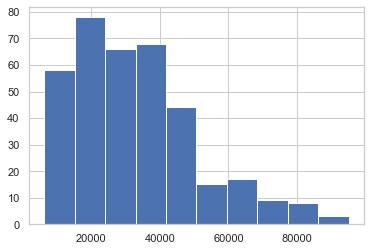

In [230]:
y.hist()

In [231]:
y

0      51947
1      76858
2      80551
3      64127
4      54152
5      48601
6      66986
7      77827
8      81881
9      72927
10     77335
11     51636
12     48725
13     76959
14     72297
15     87843
16     76573
17     72985
18     50166
19     43058
20     68143
21     72452
22     64698
23     40134
24     36072
25     54095
26     47354
27     47020
28     60936
29     59660
30     56453
31     49206
32     33159
33     33470
34     41531
35     45234
36     42531
37     42636
38     32639
39     23930
40     25926
41     34213
42     34750
43     43734
44     36427
45     29541
46     22271
47     23818
48     39572
49     31893
50     30866
51     38908
52     25357
53     23879
54     24313
55     27685
56     19683
57     18299
58     22649
59     11406
60      9621
61     10140
62     17065
63     15336
64     11604
65     12122
66      9336
67      8436
68     12096
69     14891
70     18701
71     38648
72     19489
73     12675
74     10605
75     17528
76     14397

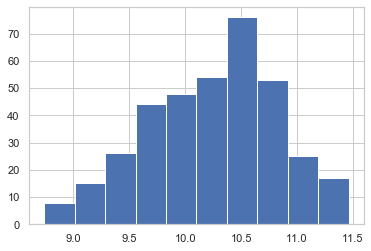

In [232]:
y_log = np.log1p(y)
y_log.hist()

In [233]:
y_log

0      10.857998
1      11.249728
2      11.296658
3      11.068636
4      10.899569
5      10.791420
6      11.112254
7      11.262257
8      11.313034
9      11.197228
10     11.255915
11     10.851994
12     10.793968
13     11.251041
14     11.188552
15     11.383318
16     11.246013
17     11.198023
18     10.823113
19     10.670327
20     11.129378
21     11.190693
22     11.077501
23     10.600004
24     10.493300
25     10.898516
26     10.765428
27     10.758350
28     11.017596
29     10.996434
30     10.941181
31     10.803791
32     10.409100
33     10.418435
34     10.634219
35     10.719626
36     10.658012
37     10.660478
38     10.393294
39     10.082930
40     10.163040
41     10.440390
42     10.455964
43     10.685904
44     10.503093
45     10.293568
46     10.011086
47     10.078239
48     10.585902
49     10.370173
50     10.337443
51     10.568981
52     10.140850
53     10.080797
54     10.098808
55     10.228682
56      9.887561
57      9.814656
58     10.0279

In [234]:
#타겟 컬럼인 count값을 log1p로 Log변환
y_log = np.log1p(y)

#로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y_log,
                                                   test_size=0.3,
                                                   random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

#테스트 데이터 셋의 Target 값은 Log 변환 되었으므로 다시 expm1을 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

#예측값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 expm1으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 0.292, RMSE:9958.429, MAE:6768.362


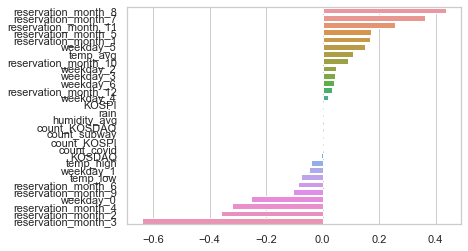

In [235]:
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [236]:
#모델과 학습/테스트 데이터 셋을 입력하면 성능평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)
#end of function get_model_predict

#model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.292, RMSE:9958.429, MAE:6768.362
### Ridge ###
RMSLE: 0.293, RMSE:9568.769, MAE:6626.076
### Lasso ###
RMSLE: 0.297, RMSE:9435.494, MAE:6538.578


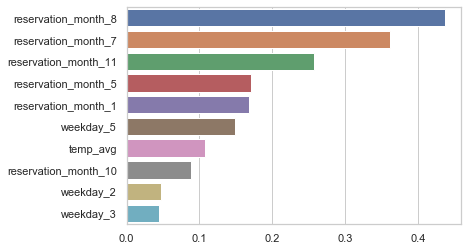

In [237]:
#상관계수 상위10개 항목 시각화
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values, y=coef_sort.index);

In [238]:
#랜덤포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.299, RMSE:9749.561, MAE:6790.120
### GradientBoostingRegressor ###
RMSLE: 0.315, RMSE:10329.455, MAE:6830.111
[14:20:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.310, RMSE:10279.436, MAE:6998.373
### LGBMRegressor ###
RMSLE: 0.311, RMSE:9947.833, MAE:6896.305
